# PyTorch Learning
KurwAI | Cheslaff | 🎄<br>
<img src="https://images.emojiterra.com/google/noto-emoji/unicode-16.0/color/1024px/1f9ab.png" width=5%>
<img src="https://em-content.zobj.net/source/apple/391/red-heart_2764-fe0f.png" width=5%>
<img src="https://static-00.iconduck.com/assets.00/pytorch-icon-1694x2048-jgwjy3ne.png" width=5%>

In [1]:
import torch
from torch import nn

import matplotlib.pyplot as plt

torch.__version__

'2.4.0+cu121'

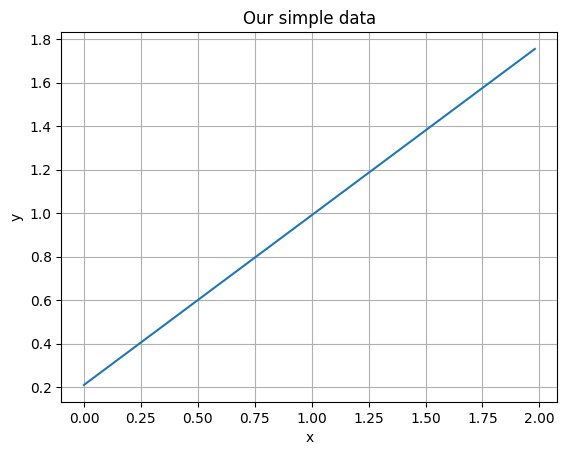

In [2]:
weight = 0.78
bias = 0.21

x = torch.arange(0, 2, 0.02)
y = weight * x + bias

plt.title("Our simple data")
plt.grid()
plt.ylabel("y")
plt.xlabel("x")
plt.plot(x, y);

In [3]:
split = 0.8
split_idx = int(split * x.shape[0])

x_train = x[:split_idx]
x_test = x[split_idx:]
y_train = y[:split_idx]
y_test = y[split_idx:]

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

torch.Size([80]) torch.Size([20]) torch.Size([80]) torch.Size([20])


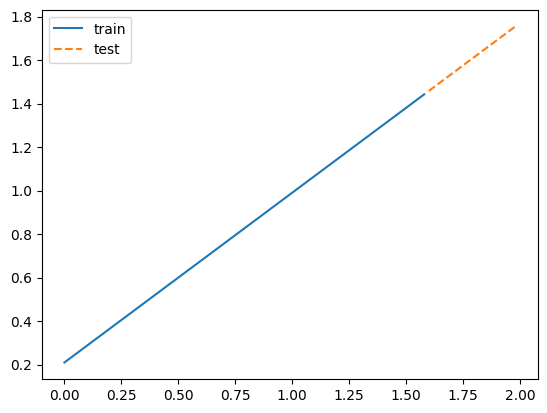

In [4]:
plt.plot(x_train, y_train, label="train")
plt.plot(x_test, y_test, "--", label="test")
plt.legend();

## Model time

In [5]:
# From scratch
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, dtype=torch.float),
                                    requires_grad=True)  # 1 number
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float),
                                     requires_grad=True)
        
    def forward(self, x) -> torch.Tensor:
        return self.weight * x + self.bias

### Important torch modules for neural network building:
- torch.nn
- torch.optim
- torch.utils.data.Dataset
- torch.utils.data.DataLoader

What code above uses:
- Parameter - stores tensors, so they are compatible with nn.Module
- nn.Module - base class for any model (requires forward)

In [6]:
modelka = LinearRegressionModel()
print(list(modelka.parameters()))  # Oh, cool!
print("="*60)
print("OR")
modelka.state_dict()  # I stick with this one

[Parameter containing:
tensor([-0.6803], requires_grad=True), Parameter containing:
tensor([-0.4438], requires_grad=True)]
OR


OrderedDict([('weight', tensor([-0.6803])), ('bias', tensor([-0.4438]))])

In [7]:
# Make a prediction:
with torch.inference_mode():
    y_preds = modelka(x_test)
y_preds  # nonsense, because model is not trained yet

tensor([-1.5323, -1.5459, -1.5595, -1.5731, -1.5867, -1.6003, -1.6139, -1.6275,
        -1.6411, -1.6547, -1.6683, -1.6819, -1.6955, -1.7091, -1.7228, -1.7364,
        -1.7500, -1.7636, -1.7772, -1.7908])

## Nerd Time!
torch.inference_mode is a context manager used for predicting (forward propagation).
It disables gradient tracking and makes forward passes only.

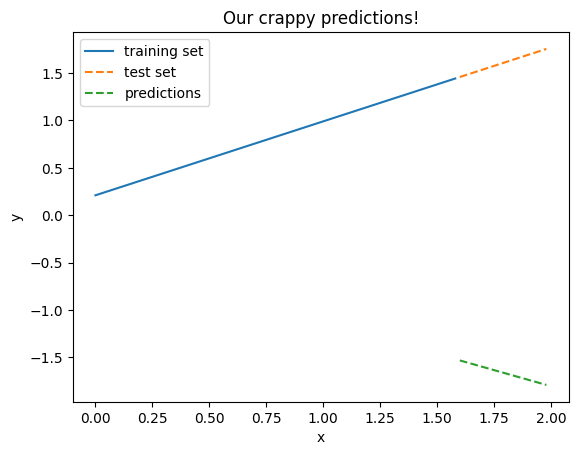

In [8]:
plt.title("Our crappy predictions!")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_train, y_train, label="training set")
plt.plot(x_test, y_test, "--", label="test set")
plt.plot(x_test, y_preds, "--", label="predictions")
plt.legend();

## Train Model
### Optimizer and loss

In [9]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params=modelka.parameters(), lr=0.1)  # params stores parameters we optimize

In [10]:
list(modelka.parameters())

[Parameter containing:
 tensor([-0.6803], requires_grad=True),
 Parameter containing:
 tensor([-0.4438], requires_grad=True)]

In [11]:
# Training Loop:

epochs = 200
for epoch in range(epochs):
    modelka.train()  # Put model in training mode (default state)
    y_pred = modelka(x_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()  # prevent accumulation
    loss.backward()  # compute gradients
    optimizer.step()  # apply gradients

In [12]:
with torch.inference_mode():
    y_preds = modelka(x_test)
y_preds

tensor([1.4558, 1.4714, 1.4869, 1.5025, 1.5180, 1.5335, 1.5491, 1.5646, 1.5801,
        1.5957, 1.6112, 1.6268, 1.6423, 1.6578, 1.6734, 1.6889, 1.7045, 1.7200,
        1.7355, 1.7511])

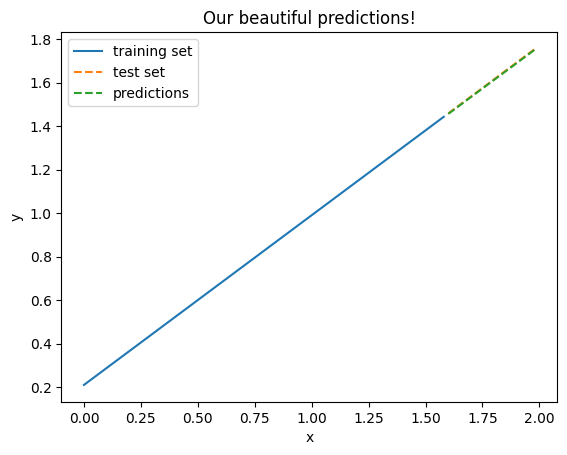

In [13]:
plt.title("Our beautiful predictions!")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_train, y_train, label="training set")
plt.plot(x_test, y_test, "--", label="test set")
plt.plot(x_test, y_preds, "--", label="predictions")
plt.legend();

In [14]:
model_state = modelka.state_dict()
print(f"Original: {0.78} Learned: {model_state["weight"]}")
print(f"Original: {0.21} Learned: {model_state["bias"]}")

Original: 0.78 Learned: tensor([0.7769])
Original: 0.21 Learned: tensor([0.2128])


## Inference

In [15]:
modelka.eval()  # set model in evaluation mode

with torch.inference_mode():
    y_pred = modelka(x_test)

print(y_pred)

tensor([1.4558, 1.4714, 1.4869, 1.5025, 1.5180, 1.5335, 1.5491, 1.5646, 1.5801,
        1.5957, 1.6112, 1.6268, 1.6423, 1.6578, 1.6734, 1.6889, 1.7045, 1.7200,
        1.7355, 1.7511])


## Save and load model
Recommended way for saving a model is by saving its state_dict()

In [16]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "my_first_pytorch_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=modelka.state_dict(), f=MODEL_SAVE_PATH)
print(f"Saved model to: {MODEL_SAVE_PATH}")

Saved model to: models/my_first_pytorch_model.pth


In [17]:
# Load:

loaded_modelka = LinearRegressionModel()
loaded_modelka.load_state_dict(torch.load(f=MODEL_SAVE_PATH))  # Gives interesting warning, but works

/tmp/ipykernel_10308/3623958961.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_modelka.load_state_dict(torch.load(f=MODEL_SAVE_PATH))  # Gives interesting warnin

<All keys matched successfully>

In [18]:
loaded_modelka.eval()  # Turns dropout or BN layers off for tests

with torch.inference_mode():  # Turns off gradient calculation
    y_pred = loaded_modelka(x_test)
y_pred  # Oh beautiful

tensor([1.4558, 1.4714, 1.4869, 1.5025, 1.5180, 1.5335, 1.5491, 1.5646, 1.5801,
        1.5957, 1.6112, 1.6268, 1.6423, 1.6578, 1.6734, 1.6889, 1.7045, 1.7200,
        1.7355, 1.7511])

## Now Let's put it all together!

In [19]:
class LinearRegression(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = None
        self.bias = torch.nn.Parameter(torch.rand(1, dtype=torch.float),
                                                    requires_grad=True)

    def initialize_weights(self, x):
        m_samples, n_features = x.shape
        self.weights = torch.nn.Parameter(torch.rand(size=(n_features, 1), dtype=torch.float),
                                                    requires_grad=True)
    
    def forward(self, x):
        if self.weights is None:
            self.initialize_weights(x)
        return torch.matmul(x, self.weights).squeeze(-1) + self.bias

In [20]:
weights = torch.tensor([0.34, 0.42, 0.41, 0.223])
bias = 0.23

torch.manual_seed(42)
X = torch.rand((1_000, 4))
y = torch.matmul(X, weights) + bias

split_idx = int(X.shape[0] * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [21]:
steroid_modelka = LinearRegression()

In [22]:
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adam(params=steroid_modelka.parameters(),
                                lr=0.01)

In [23]:
epochs = 5_000
training_loss = []


for epoch in range(epochs):
    steroid_modelka.train()
    # Loss:
    y_pred = steroid_modelka(X_train)
    loss = loss_function(y_pred, y_train)
    if epoch % 100 == 0:
        training_loss.append(loss.item())
    # Update:
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

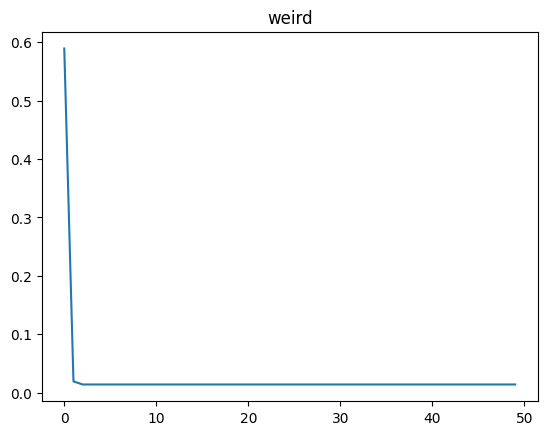

In [32]:
plt.title("weird")
plt.plot(torch.arange(epochs // 100), training_loss);

In [25]:
print(steroid_modelka.state_dict()["weights"])
print(weights)

tensor([[0.5843],
        [0.2266],
        [0.5568],
        [0.0012]])
tensor([0.3400, 0.4200, 0.4100, 0.2230])


### Weird stuff happened
#### My model behaviour is kinda sussy.
I guess there's either a gradient explosion or gradient vanishment.
Whatever, The most important of all, is that I'm now comfortable with PyTorch workflow.
Btw, I feel like using PyTorch layers and so on instead of building my own from scratch will give me performance/quality boost, because of some pro techniques used.
Anyway, that's it!
See ya in the next notebook!

**PyTorch Dummy Path 2024-2025**<br>
<img src="https://images.emojiterra.com/google/noto-emoji/unicode-16.0/color/1024px/1f9ab.png" width=5%>
<img src="https://em-content.zobj.net/source/apple/391/red-heart_2764-fe0f.png" width=5%>
<img src="https://static-00.iconduck.com/assets.00/pytorch-icon-1694x2048-jgwjy3ne.png" width=5%><br>
MIT License, no doubt